In [66]:
import os 
os.listdir("../Assignment1 Dataset/Datasets/q3")

['data_description.txt', 'test.csv', 'test_labels.csv', 'train.csv']

In [87]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [68]:
import pandas as pd 
raw_train  = pd.read_csv("../Assignment1 Dataset/Datasets/q3/train.csv")
raw_test = pd.read_csv("../Assignment1 Dataset/Datasets/q3/test.csv")
raw_test_labels = pd.read_csv("../Assignment1 Dataset/Datasets/q3/test_labels.csv")

In [69]:
raw_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,99.0,12099,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,354000
1,2,20,RL,89.0,13214,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,378500
2,3,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,153500
3,4,160,FV,30.0,3000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,173733
4,5,20,RL,NaN,6897,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,127000


In [11]:
raw_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1000.000000,1000.000000,825.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,993.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,55.435000,71.310303,10780.917000,6.118000,5.581000,1971.312000,1984.879000,107.338369,462.870000,...,90.234000,47.412000,22.470000,2.650000,16.682000,3.452000,43.394000,6.318000,2007.793000,182854.640000
std,288.819436,41.477779,24.185834,11388.573501,1.406433,1.112959,29.862995,20.604536,183.872754,470.499278,...,122.730918,68.156082,62.770831,24.189639,58.409422,44.995403,526.413324,2.686651,1.329631,82290.996386
min,1.000000,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,250.750000,20.000000,60.000000,7587.250000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,500.500000,50.000000,70.000000,9500.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,403.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163950.000000
75%,750.250000,70.000000,81.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,170.000000,740.000000,...,165.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,736.000000,547.000000,552.000000,407.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
raw_train.shape ,raw_test.shape 

((1000, 81), (460, 80))

In [29]:
num_cols = raw_train._get_numeric_data().columns
cat_cols = list(set(raw_train.columns)- set(num_cols))

In [30]:
len(cat_cols)

43

In [31]:
len(num_cols)

38

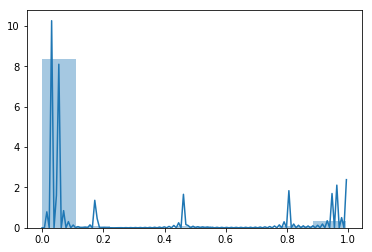

In [52]:
# check the number of missing values n
null_percent = raw_train.isnull().sum()/len(raw_train)
sns.distplot(null_percent.sort_values(ascending = False))

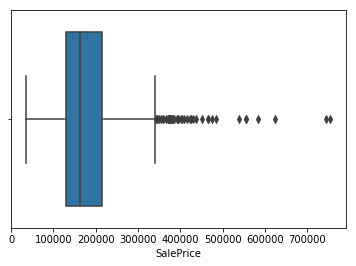

In [57]:
# detecting outliers in prices 
sns.boxplot(x=raw_train['SalePrice'])

In [61]:
Q1 = raw_train.quantile(0.25)
Q3 = raw_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = raw_train[~((raw_train < (Q1-1.5 * IQR)) |(raw_train > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

# there are 385 rows that are outliers 

Id                 499.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4012.75
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        38.00
MasVnrArea         170.00
BsmtFinSF1         740.00
BsmtFinSF2           0.00
BsmtUnfSF          599.00
TotalBsmtSF        494.50
1stFlrSF           517.25
2ndFlrSF           727.25
LowQualFinSF         0.00
GrLivArea          647.00
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         240.00
WoodDeckSF         165.00
OpenPorchSF         69.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        85000.00
dtype: float

(385, 81)

In [32]:
# check for duplicate rows 
raw_train.T.drop_duplicates().T.shape
# check for duplicate columns
raw_train.T.drop_duplicates().T.shape

In [65]:
# check for number of unique values 
raw_train._get_numeric_data().nunique().sort_values()
# it appears that some numeric columns have same number of unique records
# this means they either need to be converted or 

BsmtHalfBath        3
HalfBath            3
Fireplaces          4
KitchenAbvGr        4
FullBath            4
BsmtFullBath        4
GarageCars          5
YrSold              5
PoolArea            7
OverallCond         8
BedroomAbvGr        8
OverallQual        10
MoSold             12
TotRmsAbvGrd       12
3SsnPorch          12
LowQualFinSF       13
MSSubClass         15
MiscVal            17
ScreenPorch        60
YearRemodAdd       61
GarageYrBlt        92
EnclosedPorch      92
BsmtFinSF2         99
LotFrontage       104
YearBuilt         107
OpenPorchSF       170
WoodDeckSF        222
MasVnrArea        269
2ndFlrSF          299
GarageArea        372
BsmtFinSF1        511
SalePrice         525
TotalBsmtSF       574
BsmtUnfSF         615
1stFlrSF          623
GrLivArea         682
LotArea           785
Id               1000
dtype: int64

In [74]:
def get_categorical_columns(dataframe): 
    cat_columns = list(set(dataframe.columns)  - set(dataframe._get_numeric_data().columns)) 
    return dataframe[cat_columns ]

categorical_columns = get_categorical_columns(raw_train).columns


In [79]:
unique_cat_col = []
for col in  categorical_columns :
    unique_cat_col.append((col , raw_train[col].value_counts()))

In [80]:
unique_cat_col

[('Condition1', Norm      865
  Feedr      52
  Artery     34
  RRAn       18
  PosN       11
  RRAe        9
  RRNn        5
  PosA        4
  RRNe        2
  Name: Condition1, dtype: int64), ('ExterCond', TA    879
  Gd     99
  Fa     19
  Ex      2
  Po      1
  Name: ExterCond, dtype: int64), ('Alley', Grvl    26
  Pave    24
  Name: Alley, dtype: int64), ('FireplaceQu', Gd    262
  TA    218
  Fa     25
  Ex     18
  Po     13
  Name: FireplaceQu, dtype: int64), ('BsmtCond', TA    897
  Gd     50
  Fa     22
  Po      1
  Name: BsmtCond, dtype: int64), ('BldgType', 1Fam      845
  TwnhsE     75
  Duplex     35
  Twnhs      23
  2fmCon     22
  Name: BldgType, dtype: int64), ('LotConfig', Inside     719
  Corner     190
  CulDSac     60
  FR2         27
  FR3          4
  Name: LotConfig, dtype: int64), ('CentralAir', Y    936
  N     64
  Name: CentralAir, dtype: int64), ('Functional', Typ     933
  Min1     24
  Min2     19
  Mod      10
  Maj1     10
  Maj2      3
  Sev       1

In [ ]:
# a check for uniqueness in categorical variables revealed that no categories are having too many levels 

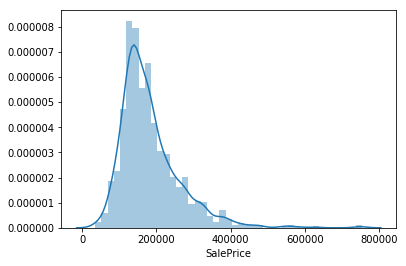

In [89]:
# differenc in target varialbes distribution from train and test 
#raw_train['SalePrice'].plot()
sns.distplot(raw_train['SalePrice'].sort_values(ascending = False))

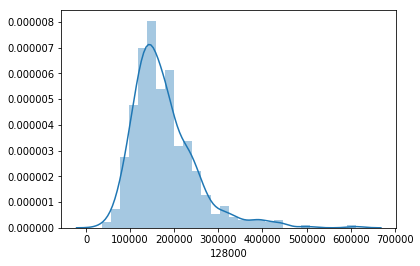

In [94]:
#raw_test_labels.plot()
sns.distplot(raw_test_labels['128000'].sort_values(ascending = False))

On comparing the distribution of train and test targets I found that there is no difference between there means. Hence, 
we can use the train set as is to predict on the test data. 